In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# siapkan data
data = load_breast_cancer()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['label'] = data.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
# split dataset
df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=46)

In [34]:
# pisahkan x & y
# train
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [35]:
# test
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

<AxesSubplot:ylabel='Frequency'>

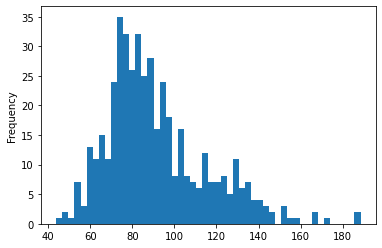

In [36]:
# bukti scaling tidak mengubah data
X_train['mean perimeter'].plot(kind='hist', bins=50)

In [37]:
# scaling
scaler = StandardScaler()
scaler.fit(X_train)

# transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

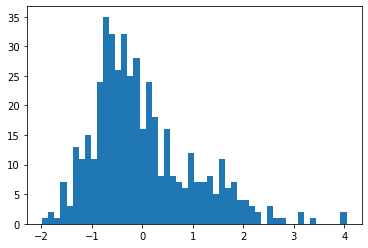

In [39]:
plt.hist(X_train_scaled[:,2], bins=50);

# KNN

In [40]:
# training
knn = KNeighborsClassifier(n_neighbors=3) #memperhatikan 3 tetangga terdekat
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# test
y_pred = knn.predict(X_test_scaled)

In [42]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1])

In [43]:
# nilai
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.97      0.96      0.96        70

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [44]:
len(y_pred)

114

# Naive Bayes

In [45]:
# training
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [46]:
# test
y_pred = nb.predict(X_test_scaled)

In [47]:
# nilai
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.96      0.94      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



### Waktu eksekusi

In [49]:
# training
knn = KNeighborsClassifier(n_neighbors=3) #memperhatikan 3 tetangga terdekat
%timeit knn.fit(X_train_scaled, y_train)

811 µs ± 227 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
# training
logreg = LogisticRegression()
%timeit logreg.fit(X_train_scaled, y_train)

17 ms ± 3.77 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%timeit y_pred = knn.predict(X_test_scaled)

13.2 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
%timeit y_pred = logreg.predict(X_test_scaled)

210 µs ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
